In [152]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

## Problem 2: MCMC 1-d Gaussian
We test the Metropolis-Hastings MCMC algorithm here to reproduce a simple 1-d Gaussian with mean $\mu$ and variance $\sigma^2$. 

First, we set those parameters below:

In [165]:
mu = 5.0
sigma = 1.0
params = np.array((mu,sigma*sigma)) #stores the variance rather than std. dev.

We then define a likelihood function $P(\theta)$. Specifically, the likelihood function in this case is a normalized Gaussian $P\sim G(\mu,\sigma)$:

\begin{align}
P(\theta) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-(\theta-\mu)^2/2\sigma^2}
\end{align}

Since flat priors are assumed, and since the likelihood is normalized, the likelihood is also therefore the properly normalized posterior.

In [166]:
def likelihood_func(theta):
    p = 1./np.sqrt(2*np.pi*params[1])*np.exp(-.5*(theta-params[0])*(theta-params[0])/params[1])#normalized gaussian
    return p

We next define a *proposal* density function for the next chain element:

\begin{align}
p(\theta_i)\rightarrow p(\theta_{i+1})
\end{align}

We here choose a Gaussian as well, with mean $0$ and variance $\sigma_p^2$. In addition, we add another parameter $A$ which increases the step size :

\begin{align}
Q(\theta_i,\theta_{i+1})\sim \theta_i + A\cdot G(0,\sigma_p)
\end{align}

In [155]:
def prop_func(t_old,mu_prop,sigma_prop,step_size):
    t_prop = t_old + step_size*np.random.normal(mu_prop,sigma_prop,1)
    return t_prop
    

We are given $(\mu,\sigma)=(5.0,1.0)$ and want to choose appropriate step sizes to achieve an acceptance fraction $0.25\lesssim f\lesssim 0.5$.

In [331]:
t_start = 0.0
mu_p = 0.0
sig_p = 1.0
step_size = 2.5
def prop(t_old):
    return prop_func(t_old,mu_p,sig_p,step_size)

We then define the Metropolis-Hastings component of M-H MCMC. Given a proposal state $\theta_{i+1}$, we define the *acceptance fraction* $\alpha$ as
\begin{align}
\alpha(\theta_i,\theta_{i+1})\equiv \frac{P(\theta_{i+1})}{P(\theta_i)}
\end{align}

We accept under two conditions. First, if $\alpha\geq 1$, we "accept" the proposed state as the new state. If $\alpha<1$, we accept the proposed state $\theta_{i+1}$ with probability $\alpha$, as sampled from a uniform distribution in $[0,1]$. Otherwise, we add the previous state $\theta_i$ to the chain.

In [308]:
def new_state(t_old,t_prop):
    alpha = likelihood_func(t_prop)/likelihood_func(t_old)
    if alpha >= 1.0:
        return t_prop
    else:
        if alpha >= np.random.rand(1):
            return t_prop
    return t_old

Here we actually do the MCMC iteration to generate the chain. We plot the (normalized) histogram (blue) of the chain, as well as the likelihood function (solid red line) for each value. For 10,000 iterations, the algorithm nicely approximates the 1-d Gaussian, as expected. For a choice of $\sigma_p=1.0$ and $A=2.5$ for the step sizes, we get an acceptance fraction $f\approx 0.43$.

0.4311


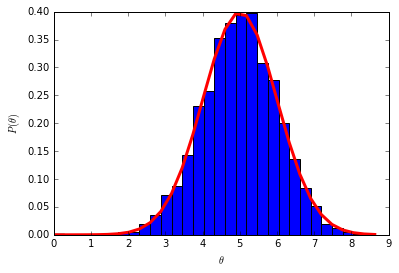

In [332]:
num_theta = 10000

theta = np.array(t_start)

t_old = t_start
t_prop = t_start
t_new = t_start

while np.size(theta) < num_theta:
    t_old = t_new
    t_prop = prop(t_old)
    t_new = new_state(t_old,t_prop)
    theta = np.append(theta,t_new)
    

accept = np.size(np.unique(theta))/num_theta
print(accept)
count, bins, ignored = plt.hist(theta,bins=30,normed=True)
plt.plot(bins,likelihood_func(bins),linewidth=3,color='red')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P\,(\theta)$')

We also plot the step number vs. $\ln\,P$ and $\theta$ vs $\ln\,P$, which shows proper convergence.

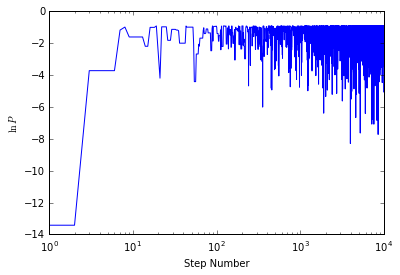

In [322]:
plt.plot(range(np.size(theta)),np.log(likelihood_func(theta)))
plt.xscale('log')
plt.xlabel('Step Number')
plt.ylabel(r'$\ln\,P$')

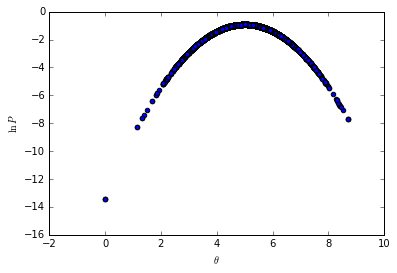

In [329]:
plt.scatter(theta,np.log(likelihood_func(theta)))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\ln\,P$')